In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

**Which city has the highest average price for each commodity, and how does it compare to the national average price for that commodity?** *(Case Study Q2)*

city                   object
commodity              object
city_avg_price        float64
national_avg_price    float64
dtype: object


<ipython-input-3-adcb9c47d860>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  palette = plt.cm.get_cmap("tab20", num_colors)


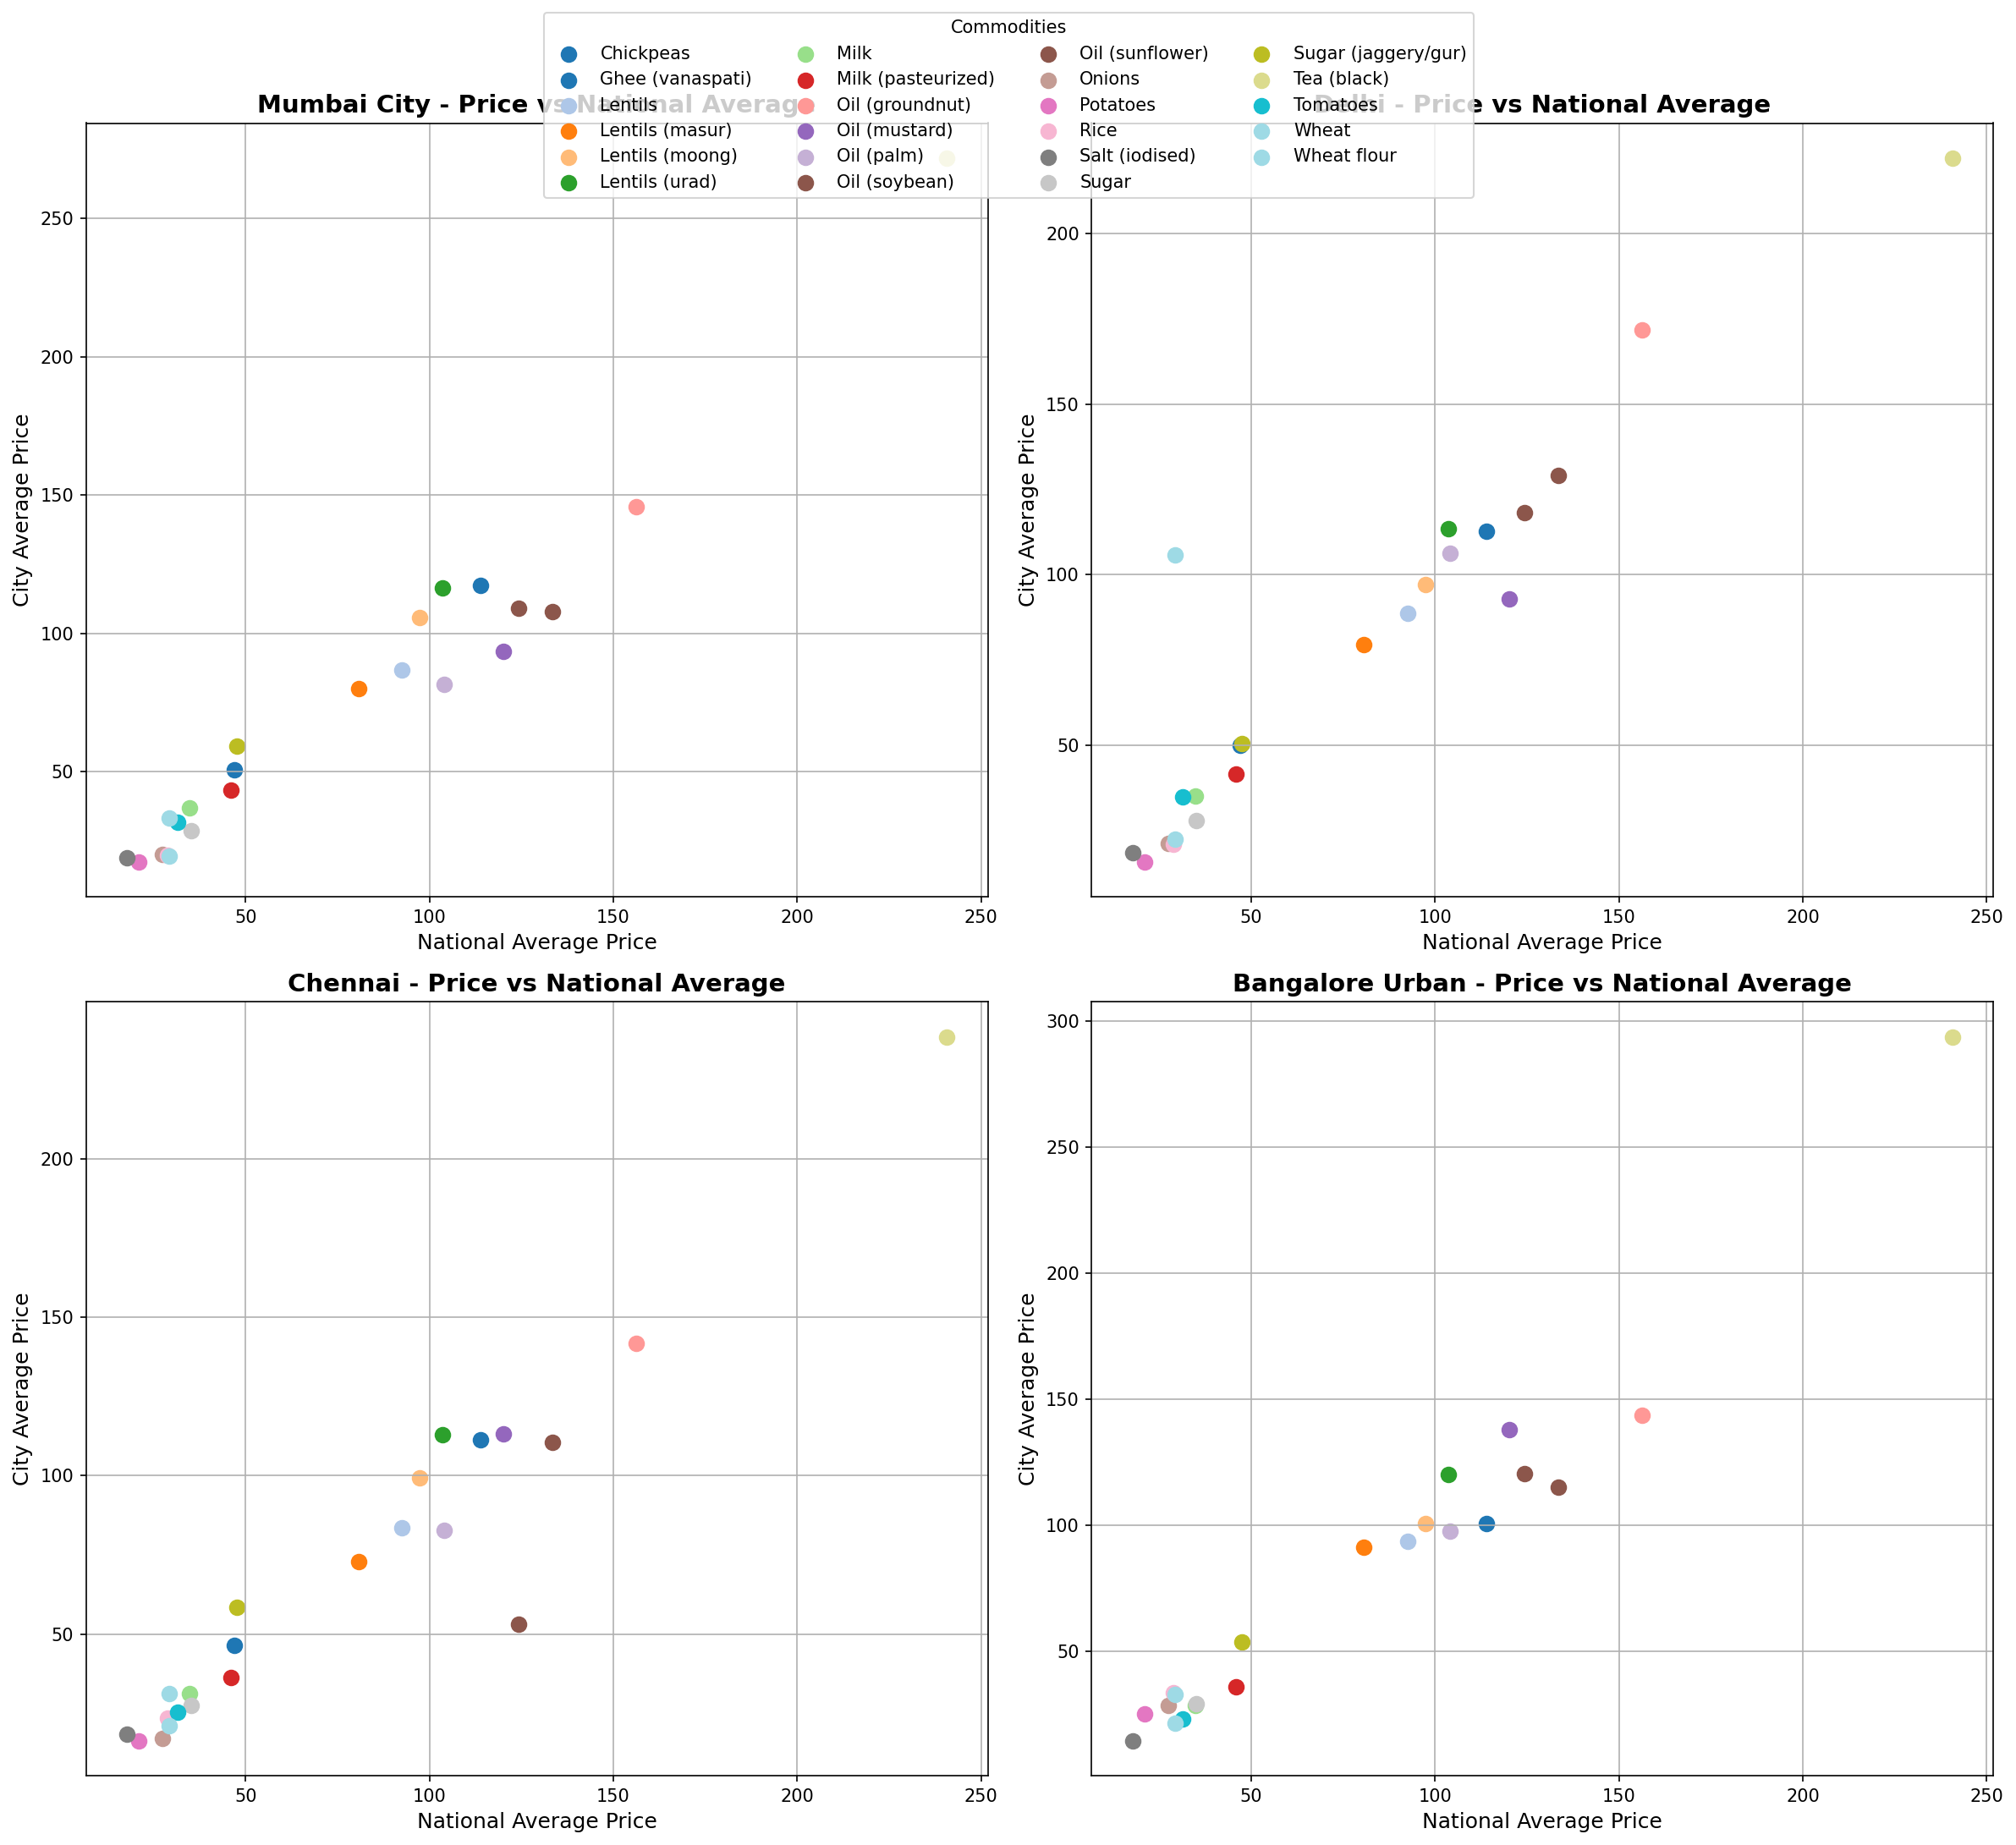

In [ ]:
q2_df = pd.read_csv("./outputs/q2.csv").round(2)
q2_df = q2_df.round(2)

print(q2_df.dtypes)

major_cities = ["Mumbai City", "Delhi", "Chennai", "Bangalore Urban"]
filtered_df = q2_df[q2_df["city"].isin(major_cities)]
commodities = filtered_df["commodity"].unique()

num_colors = len(commodities)
palette = plt.cm.get_cmap("tab20", num_colors)
commodity_colors = {commodity: palette(i) for i, commodity in enumerate(commodities)}

fig, axes = plt.subplots(2, 2, figsize=(16, 14), dpi=150)
axes = axes.flatten()

for i, city in enumerate(major_cities):
    city_data = filtered_df[filtered_df["city"] == city]

    for commodity in city_data["commodity"].unique():
        data = city_data[city_data["commodity"] == commodity]
        axes[i].scatter(
            data["national_avg_price"],
            data["city_avg_price"],
            label=commodity,
            color=commodity_colors[commodity],
            s=70,
        )

    axes[i].set_xlabel("National Average Price", fontsize=12)
    axes[i].set_ylabel("City Average Price", fontsize=12)
    axes[i].set_title(
        f"{city} - Price vs National Average", fontsize=14, fontweight="bold"
    )
    axes[i].grid(True)

fig.legend(
    commodity_colors.keys(),
    title="Commodities",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.04),
    ncol=4,
    fontsize=10,
)
plt.tight_layout()
plt.show()

**Analyse the evolution of commodity prices over time, revealing year-to-year price dynamics and identifying significant market trends.** *(Case Study Q10)*

<ipython-input-4-9eb72922fbd9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  q10_df.fillna(method="ffill", inplace=True)


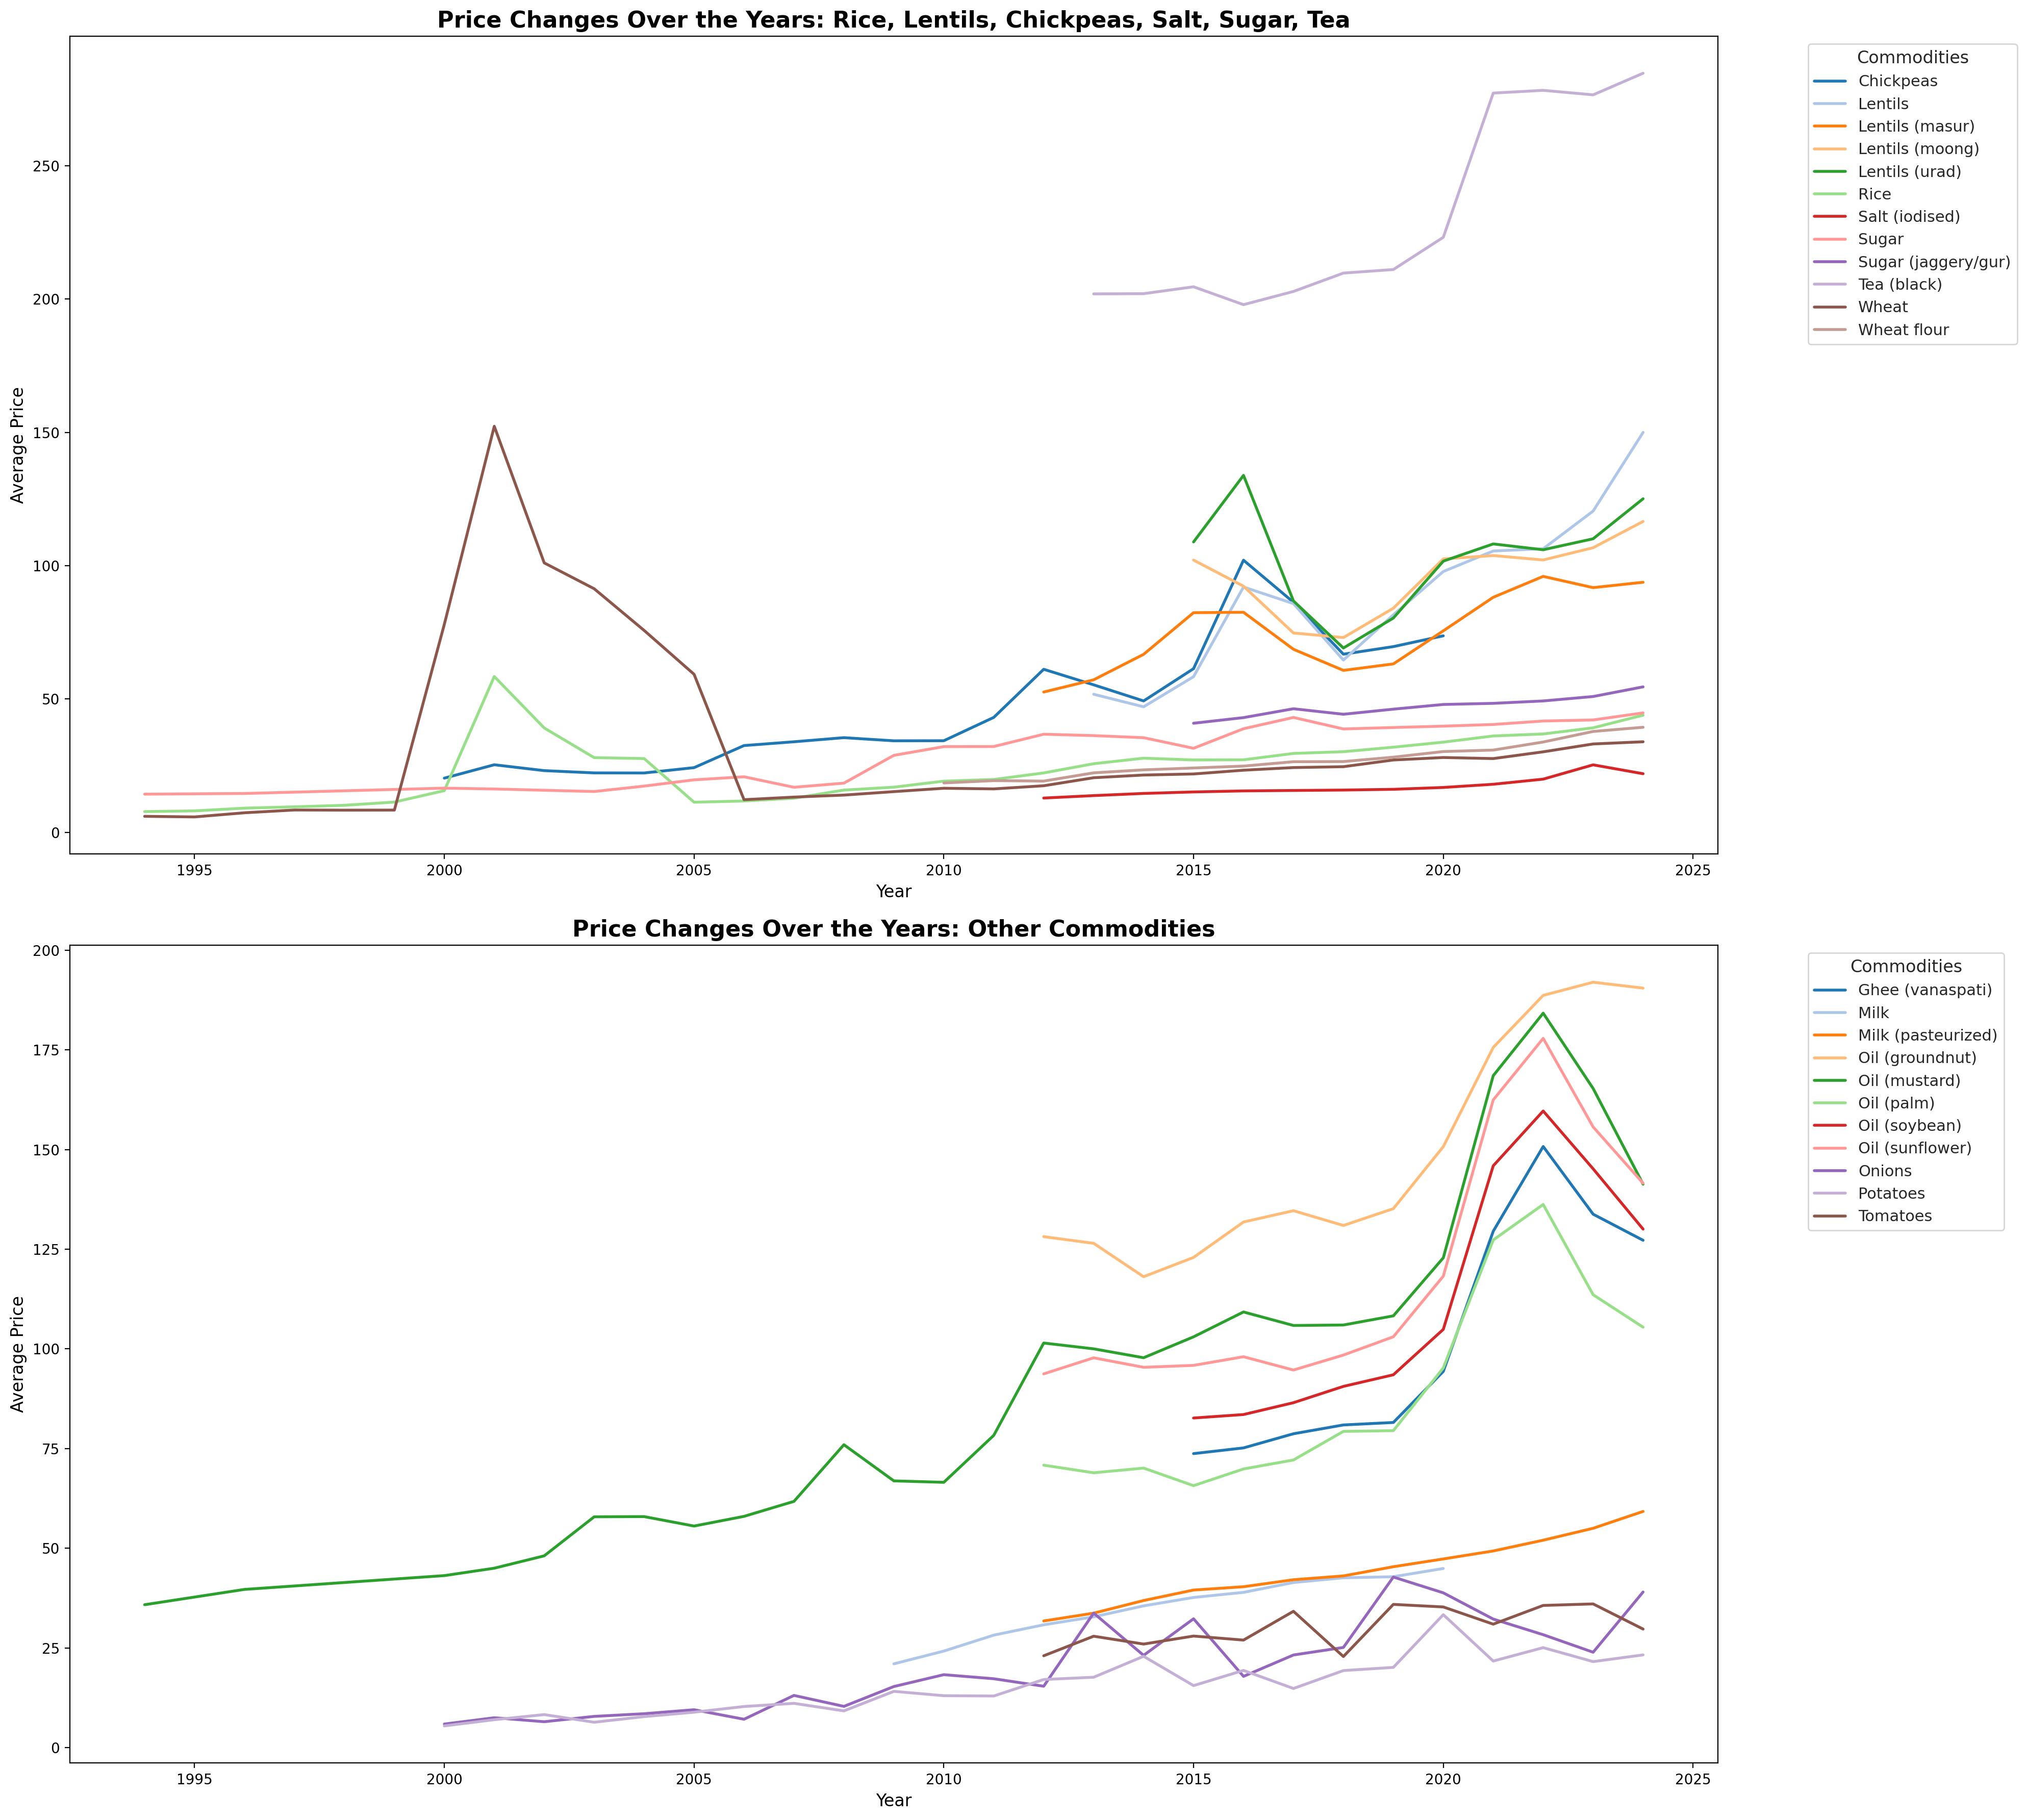

In [ ]:
q10_df = pd.read_csv("./outputs/q10.csv").round(2)
q10_df.fillna(method="ffill", inplace=True)

selected_commodities = {
    "Chickpeas",
    "Lentils",
    "Lentils (masur)",
    "Lentils (moong)",
    "Lentils (urad)",
    "Rice",
    "Salt (iodised)",
    "Sugar",
    "Sugar (jaggery/gur)",
    "Tea (black)",
    "Wheat",
    "Wheat flour",
}

df_selected = q10_df[q10_df["commodity"].isin(selected_commodities)]
df_rest = q10_df[~q10_df["commodity"].isin(selected_commodities)]

fig, axes = plt.subplots(2, 1, figsize=(20, 18), dpi=200)
sns.set(style="whitegrid")

palette1 = sns.color_palette("tab20", n_colors=df_selected["commodity"].nunique())
for i, (commodity, data) in enumerate(df_selected.groupby("commodity")):
    axes[0].plot(
        data["year"], data["avg_price"], label=commodity, color=palette1[i], linewidth=2
    )

axes[0].set_title(
    "Price Changes Over the Years: Rice, Lentils, Chickpeas, Salt, Sugar, Tea",
    fontsize=16,
    fontweight="bold",
)
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Average Price", fontsize=12)
axes[0].legend(title="Commodities", bbox_to_anchor=(1.05, 1), loc="upper left")

palette2 = sns.color_palette("tab20", n_colors=df_rest["commodity"].nunique())
for i, (commodity, data) in enumerate(df_rest.groupby("commodity")):
    axes[1].plot(
        data["year"], data["avg_price"], label=commodity, color=palette2[i], linewidth=2
    )

axes[1].set_title(
    "Price Changes Over the Years: Other Commodities", fontsize=16, fontweight="bold"
)
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Average Price", fontsize=12)
axes[1].legend(title="Commodities", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

**How do food prices in metropolitan cities compare to other markets during different seasons of the year?** *(Case Study Q9)*

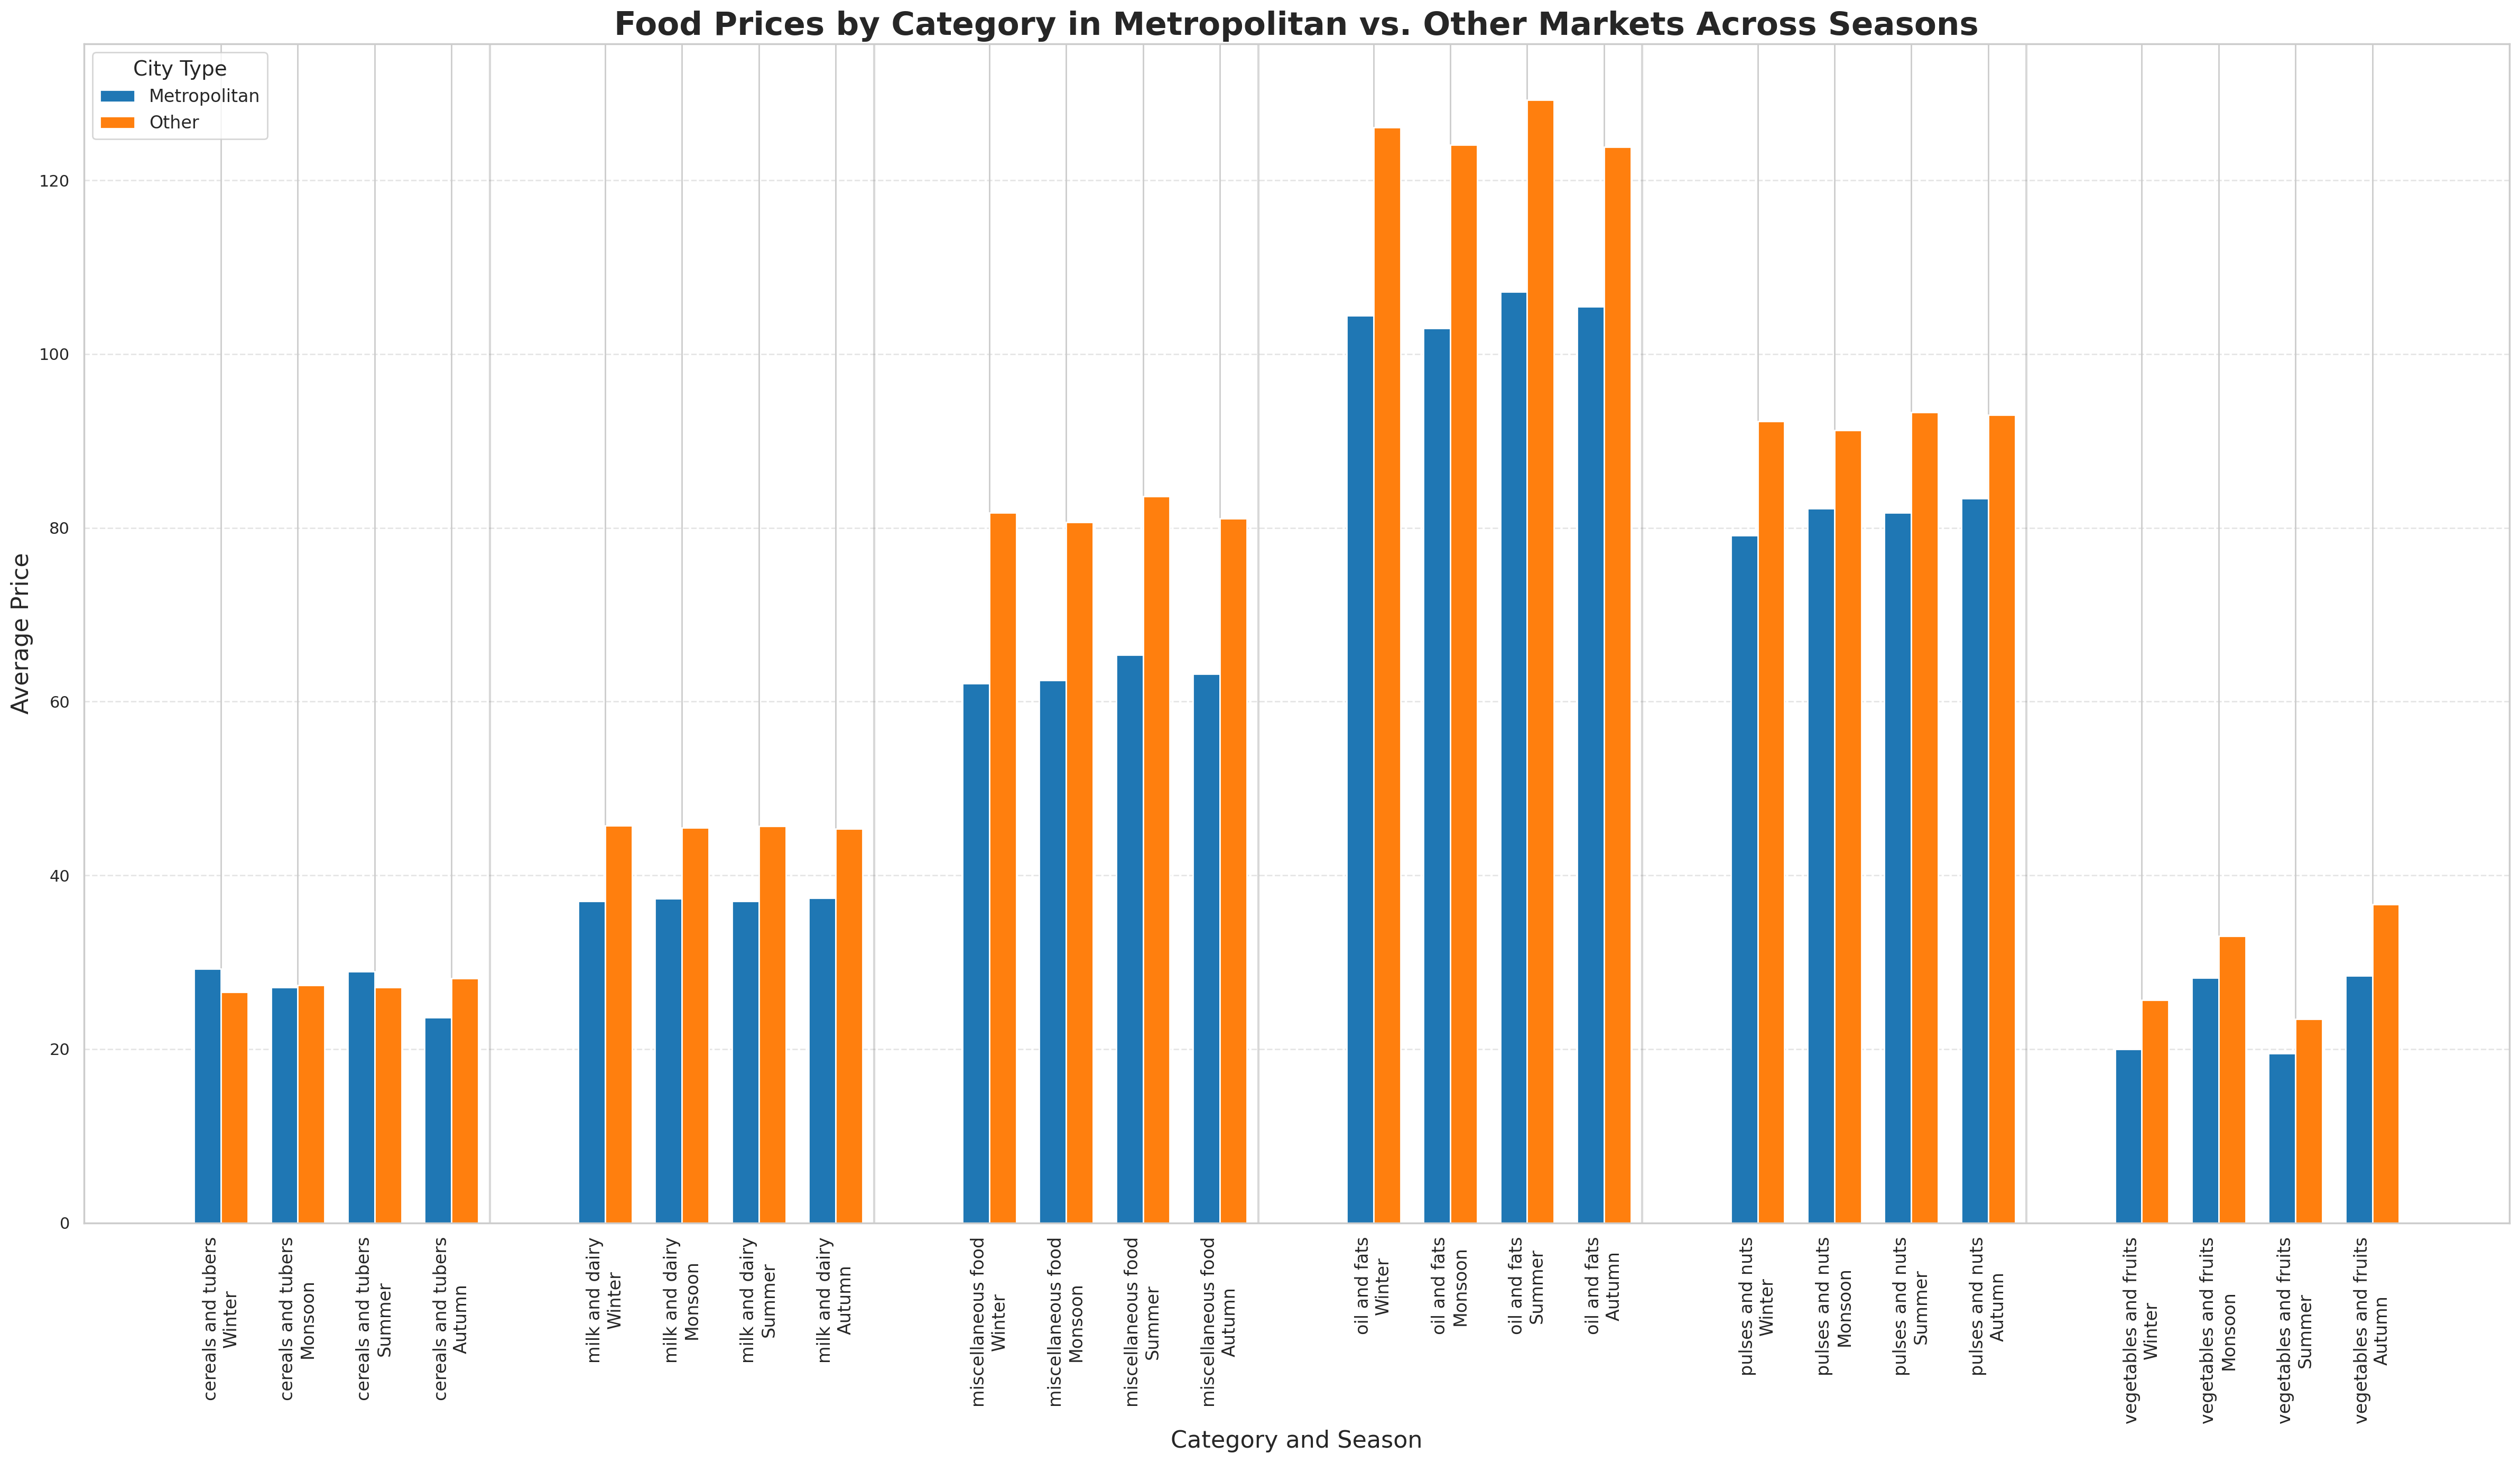

In [ ]:
q9_df = pd.read_csv("./outputs/q9.csv").round(2)

categories = q9_df["category"].unique()
seasons = ["Winter", "Monsoon", "Summer", "Autumn"]
existing_seasons = [s for s in seasons if s in q9_df["season"].unique()]

fig, ax = plt.subplots(figsize=(24, 14), dpi=200)
bar_width = 0.35
x_positions = []
x_labels = []
metro_prices = []
other_prices = []
position = 0

for i, category in enumerate(categories):
    for season in existing_seasons:
        metro_data = q9_df[
            (q9_df["city_type"] == "Metropolitan")
            & (q9_df["category"] == category)
            & (q9_df["season"] == season)
        ]

        other_data = q9_df[
            (q9_df["city_type"] == "Other")
            & (q9_df["category"] == category)
            & (q9_df["season"] == season)
        ]

        if not metro_data.empty and not other_data.empty:
            x_positions.append(position)
            x_labels.append(f"{category}\n{season}")
            metro_prices.append(metro_data["avg_price"].values[0])
            other_prices.append(other_data["avg_price"].values[0])
            position += 1

    position += 1

x = np.array(x_positions)
metro_prices = np.array(metro_prices)
other_prices = np.array(other_prices)

ax.bar(
    x - bar_width / 2, metro_prices, bar_width, label="Metropolitan", color="#1f77b4"
)
ax.bar(x + bar_width / 2, other_prices, bar_width, label="Other", color="#ff7f0e")

plt.title(
    "Food Prices by Category in Metropolitan vs. Other Markets Across Seasons",
    fontsize=22,
    fontweight="bold",
)
plt.xlabel("Category and Season", fontsize=16)
plt.ylabel("Average Price", fontsize=16)
plt.xticks(ticks=x, labels=x_labels, rotation=90, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)

current_category = categories[0]
for i, label in enumerate(x_labels):
    category = label.split("\n")[0]
    if category != current_category and i > 0:
        plt.axvline(x=x[i - 1] + 0.5, color="gray", linestyle="-", alpha=0.3)
        current_category = category

plt.legend(title="City Type", title_fontsize=14, fontsize=12, loc="upper left")
plt.tight_layout()
plt.show()

**Identify the cheapest and costliest state for each commodity for a given year? Take the year 2024 for example.** *(Case Study Q13)*

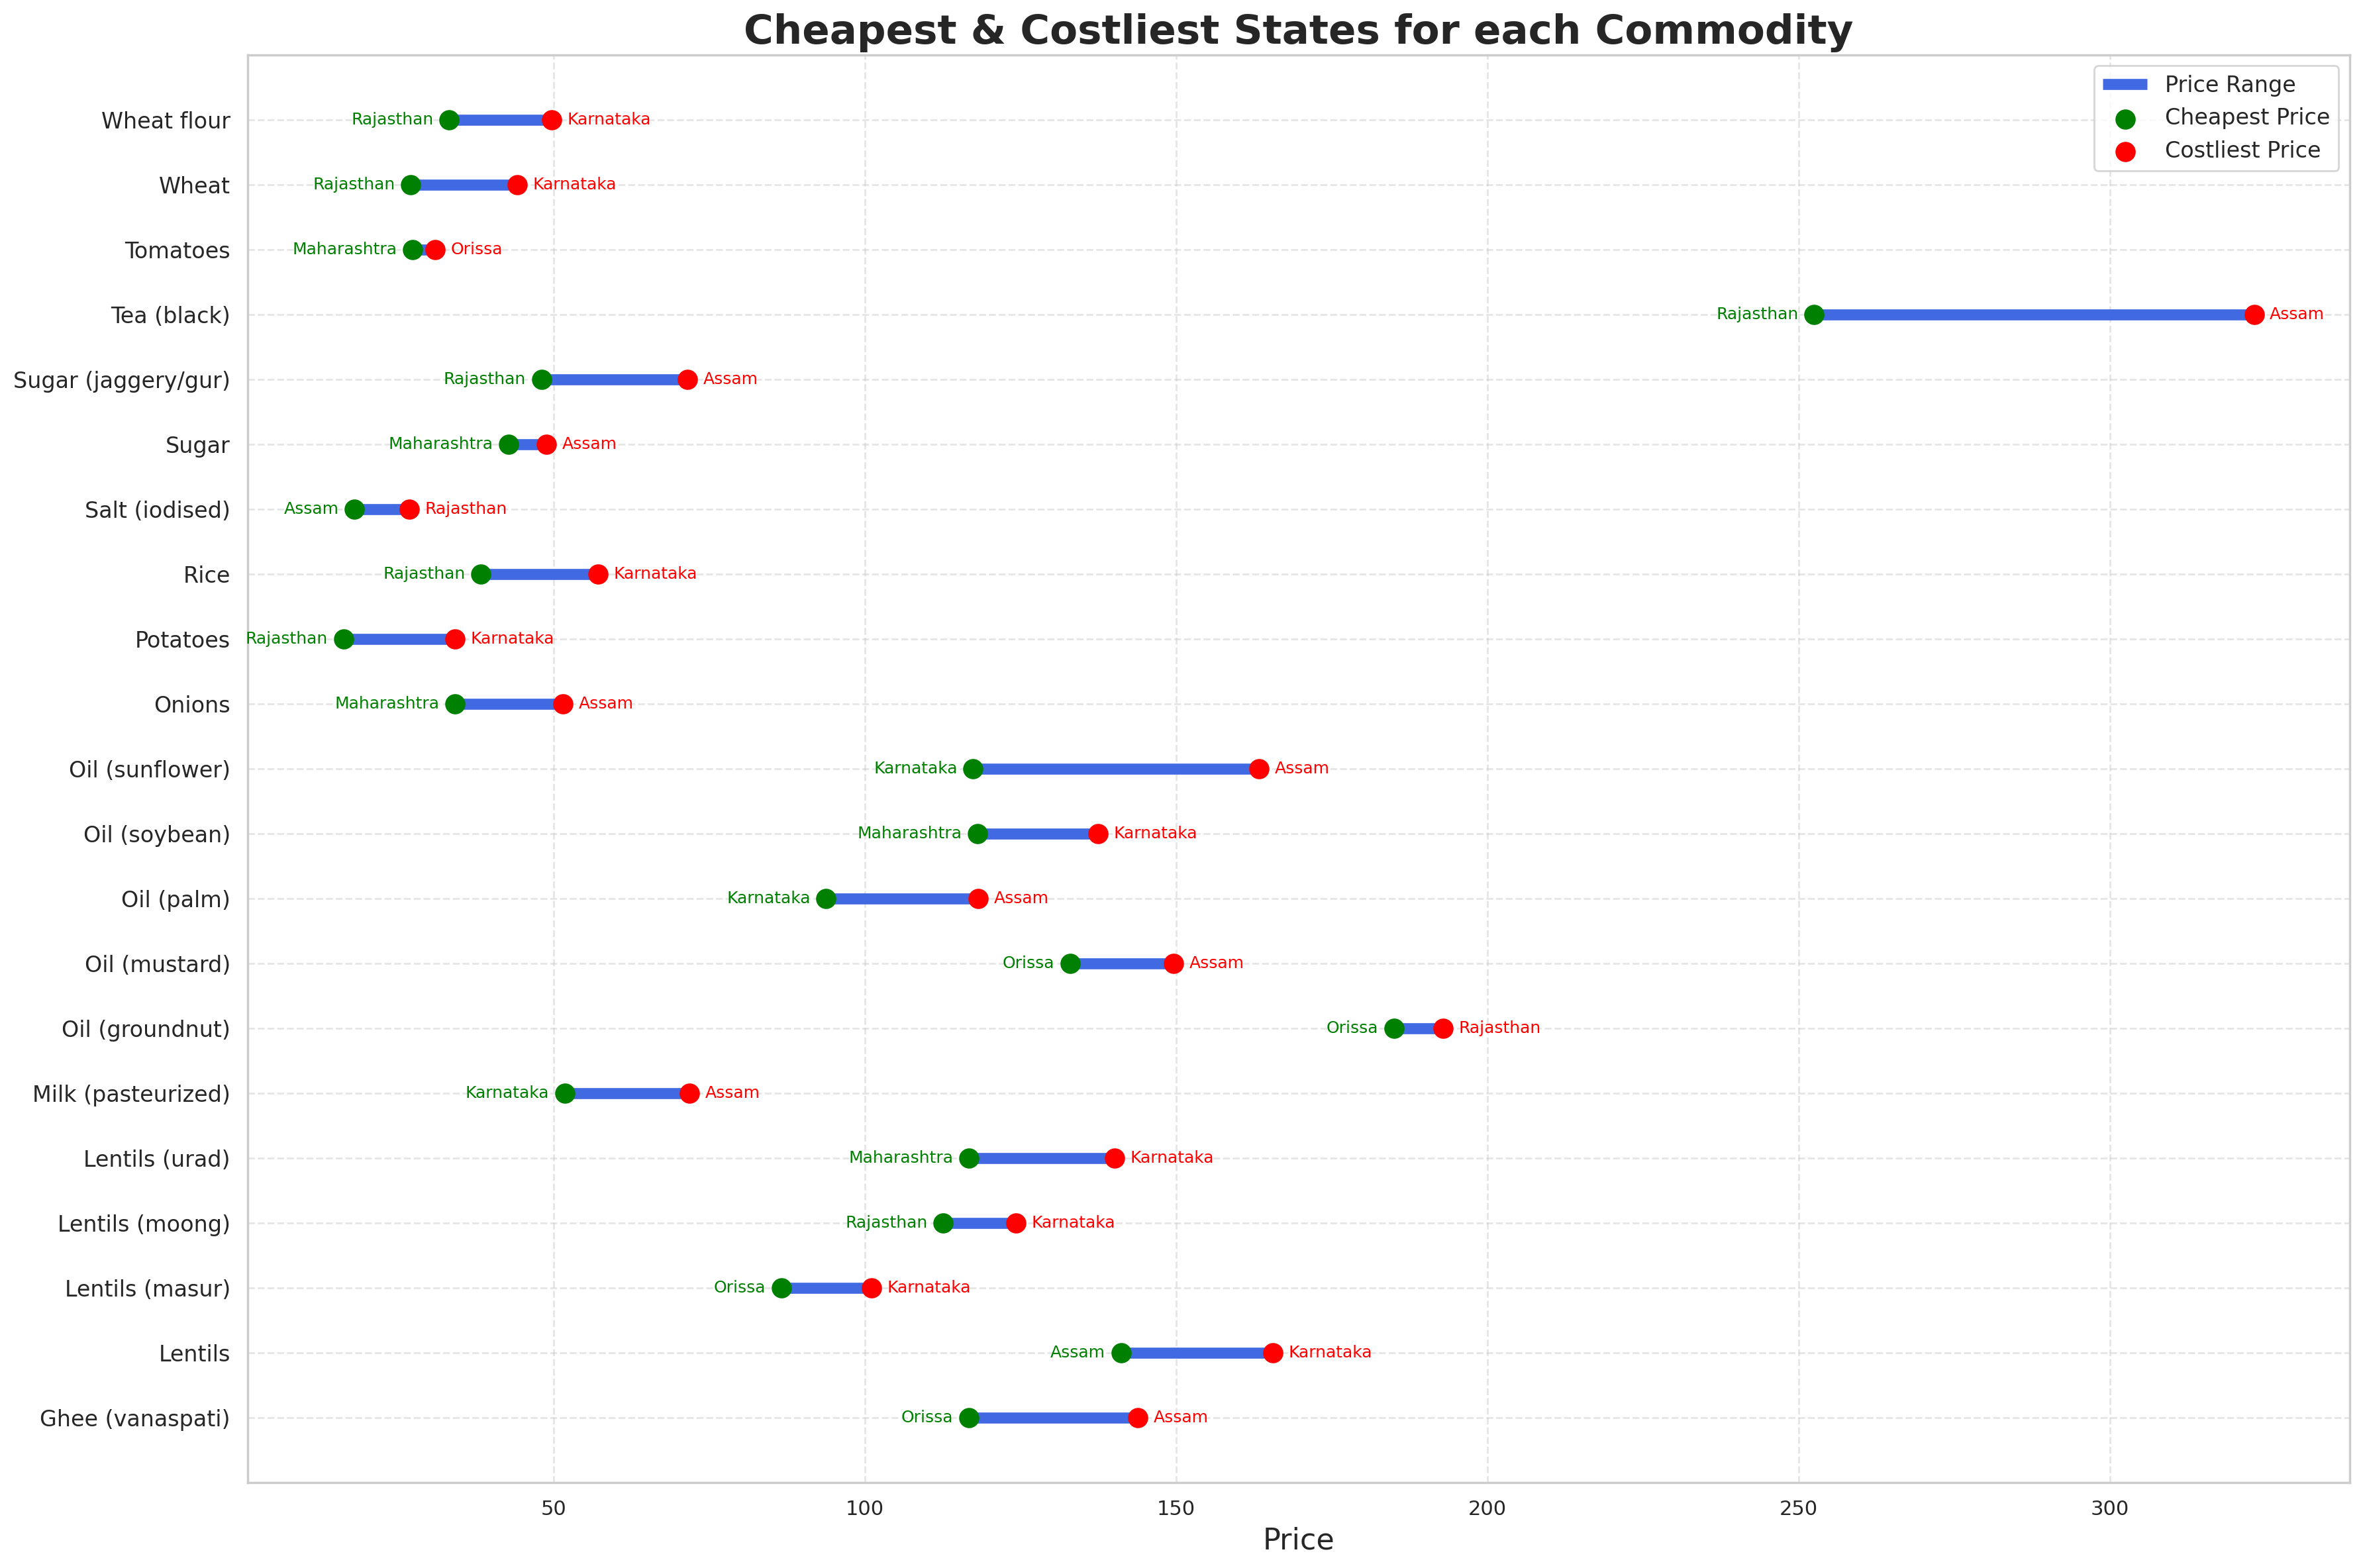

In [ ]:
q13_df = pd.read_csv("./outputs/q13.csv").round(2)
q13_df = q13_df.sort_values("commodity")

fig, ax = plt.subplots(figsize=(18, 12), dpi=200)

for i, row in q13_df.iterrows():
    ax.hlines(
        y=i,
        xmin=row["cheapest_state_price"],
        xmax=row["costliest_state_price"],
        color="royalblue",
        linewidth=6,
        label="Price Range" if i == 0 else "",
    )

    ax.text(
        row["cheapest_state_price"] - 2.5,
        i,
        f"{row['cheapest_state']}",
        va="center",
        ha="right",
        color="green",
        fontsize=9,
    )

    ax.text(
        row["costliest_state_price"] + 2.5,
        i,
        f"{row['costliest_state']}",
        va="center",
        ha="left",
        color="red",
        fontsize=9,
    )

ax.scatter(
    q13_df["cheapest_state_price"],
    range(len(q13_df)),
    color="green",
    label="Cheapest Price",
    s=100,
    zorder=3,
)
ax.scatter(
    q13_df["costliest_state_price"],
    range(len(q13_df)),
    color="red",
    label="Costliest Price",
    s=100,
    zorder=3,
)

ax.set_yticks(range(len(q13_df)))
ax.set_yticklabels(q13_df["commodity"], fontsize=12)
ax.set_xlabel("Price", fontsize=16)
ax.set_title(
    "Cheapest & Costliest States for each Commodity", fontsize=22, fontweight="bold"
)

ax.grid(True, linestyle="--", alpha=0.5)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

**What is the average price of each commodity across different states, and how does it vary by season?** *(Case Study Q1)*

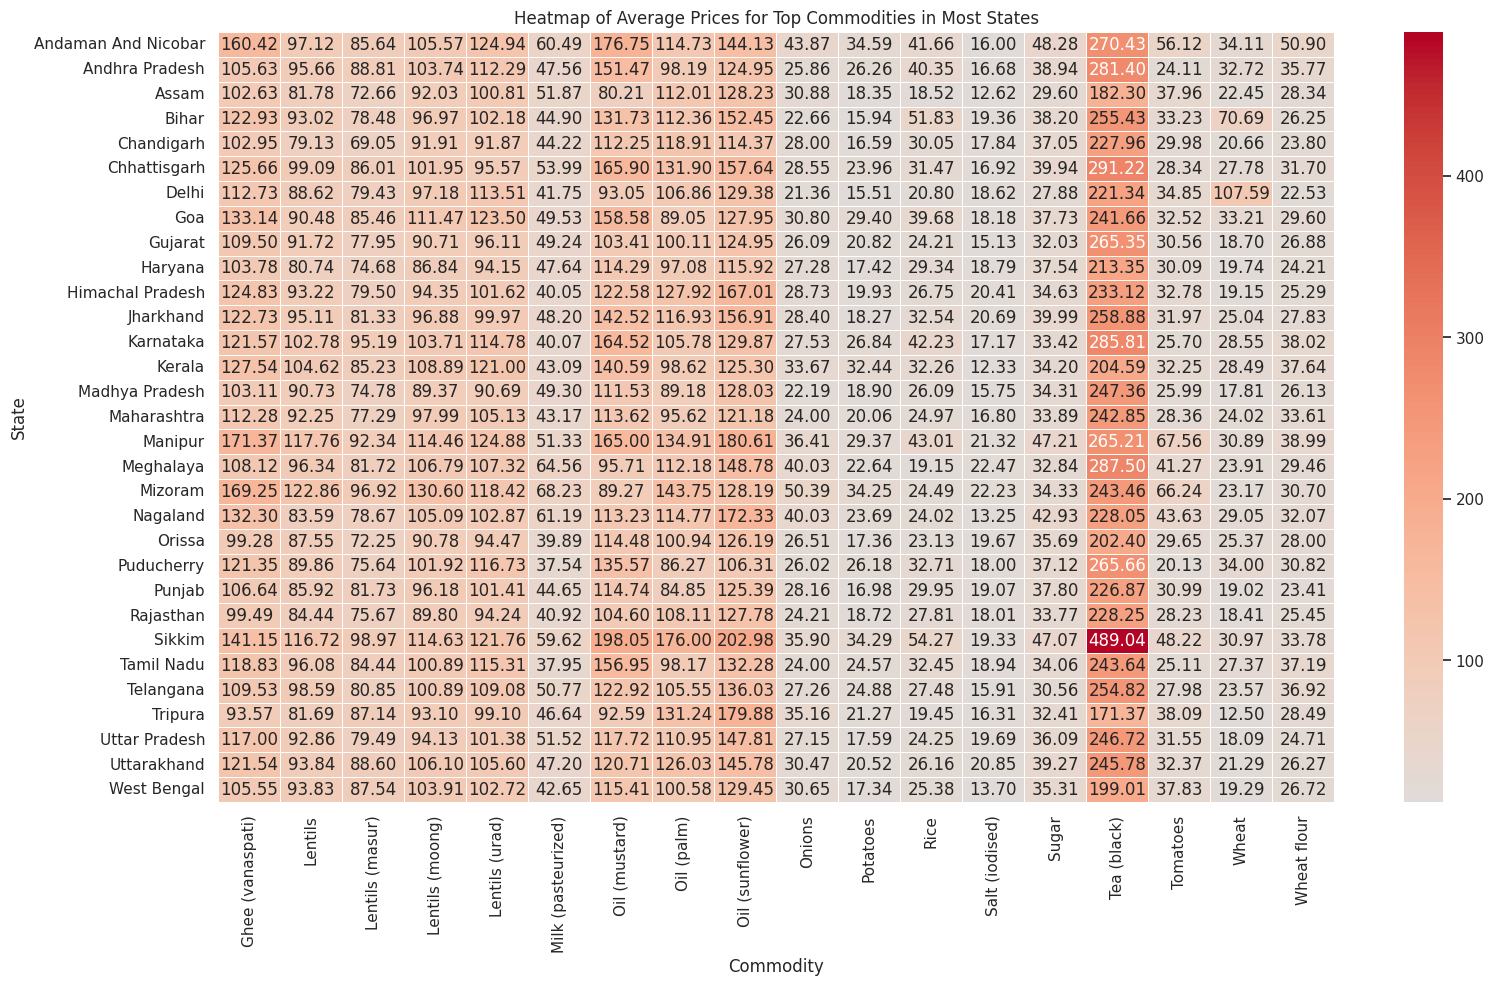

In [ ]:
q1_df = pd.read_csv("./outputs/q1.csv").round(2)

commodity_state_count = q1_df.groupby("commodity")["state"].nunique().reset_index()
commodity_state_count = commodity_state_count.sort_values("state", ascending=False)

# Get the commodities present in most states
top_p = 0.8 # 80%
top_commodities = commodity_state_count.head(int(len(commodity_state_count) * top_p))[
    "commodity"
].tolist()
filtered_data = q1_df[q1_df["commodity"].isin(top_commodities)]

pivot_data = filtered_data.pivot_table(
    values="avg_price", index="state", columns="commodity", aggfunc="mean", fill_value=0
)

plt.figure(figsize=(18, 10))
sns.heatmap(
    pivot_data,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
)
plt.title("Heatmap of Average Prices for Top Commodities in Most States")
plt.xlabel("Commodity")
plt.ylabel("State")
plt.show()

In [8]:
avg_price_per_commodity = q1_df.groupby("commodity")["avg_price"].mean().reset_index()
bubble_data = pd.merge(commodity_state_count, avg_price_per_commodity, on="commodity")

fig1 = px.scatter(
    bubble_data,
    x="state",
    y="avg_price",
    size="state",
    hover_name="commodity",
    title="Bubble Chart: Average Price vs. State Count",
    labels={"state": "Number of States", "avg_price": "Average Price"},
    color="commodity",
    size_max=50,
)

fig1.show()

**Which markets have the highest average price for each category, and how does it compare to the overall average price for that category?** *(Case Study Q5)*

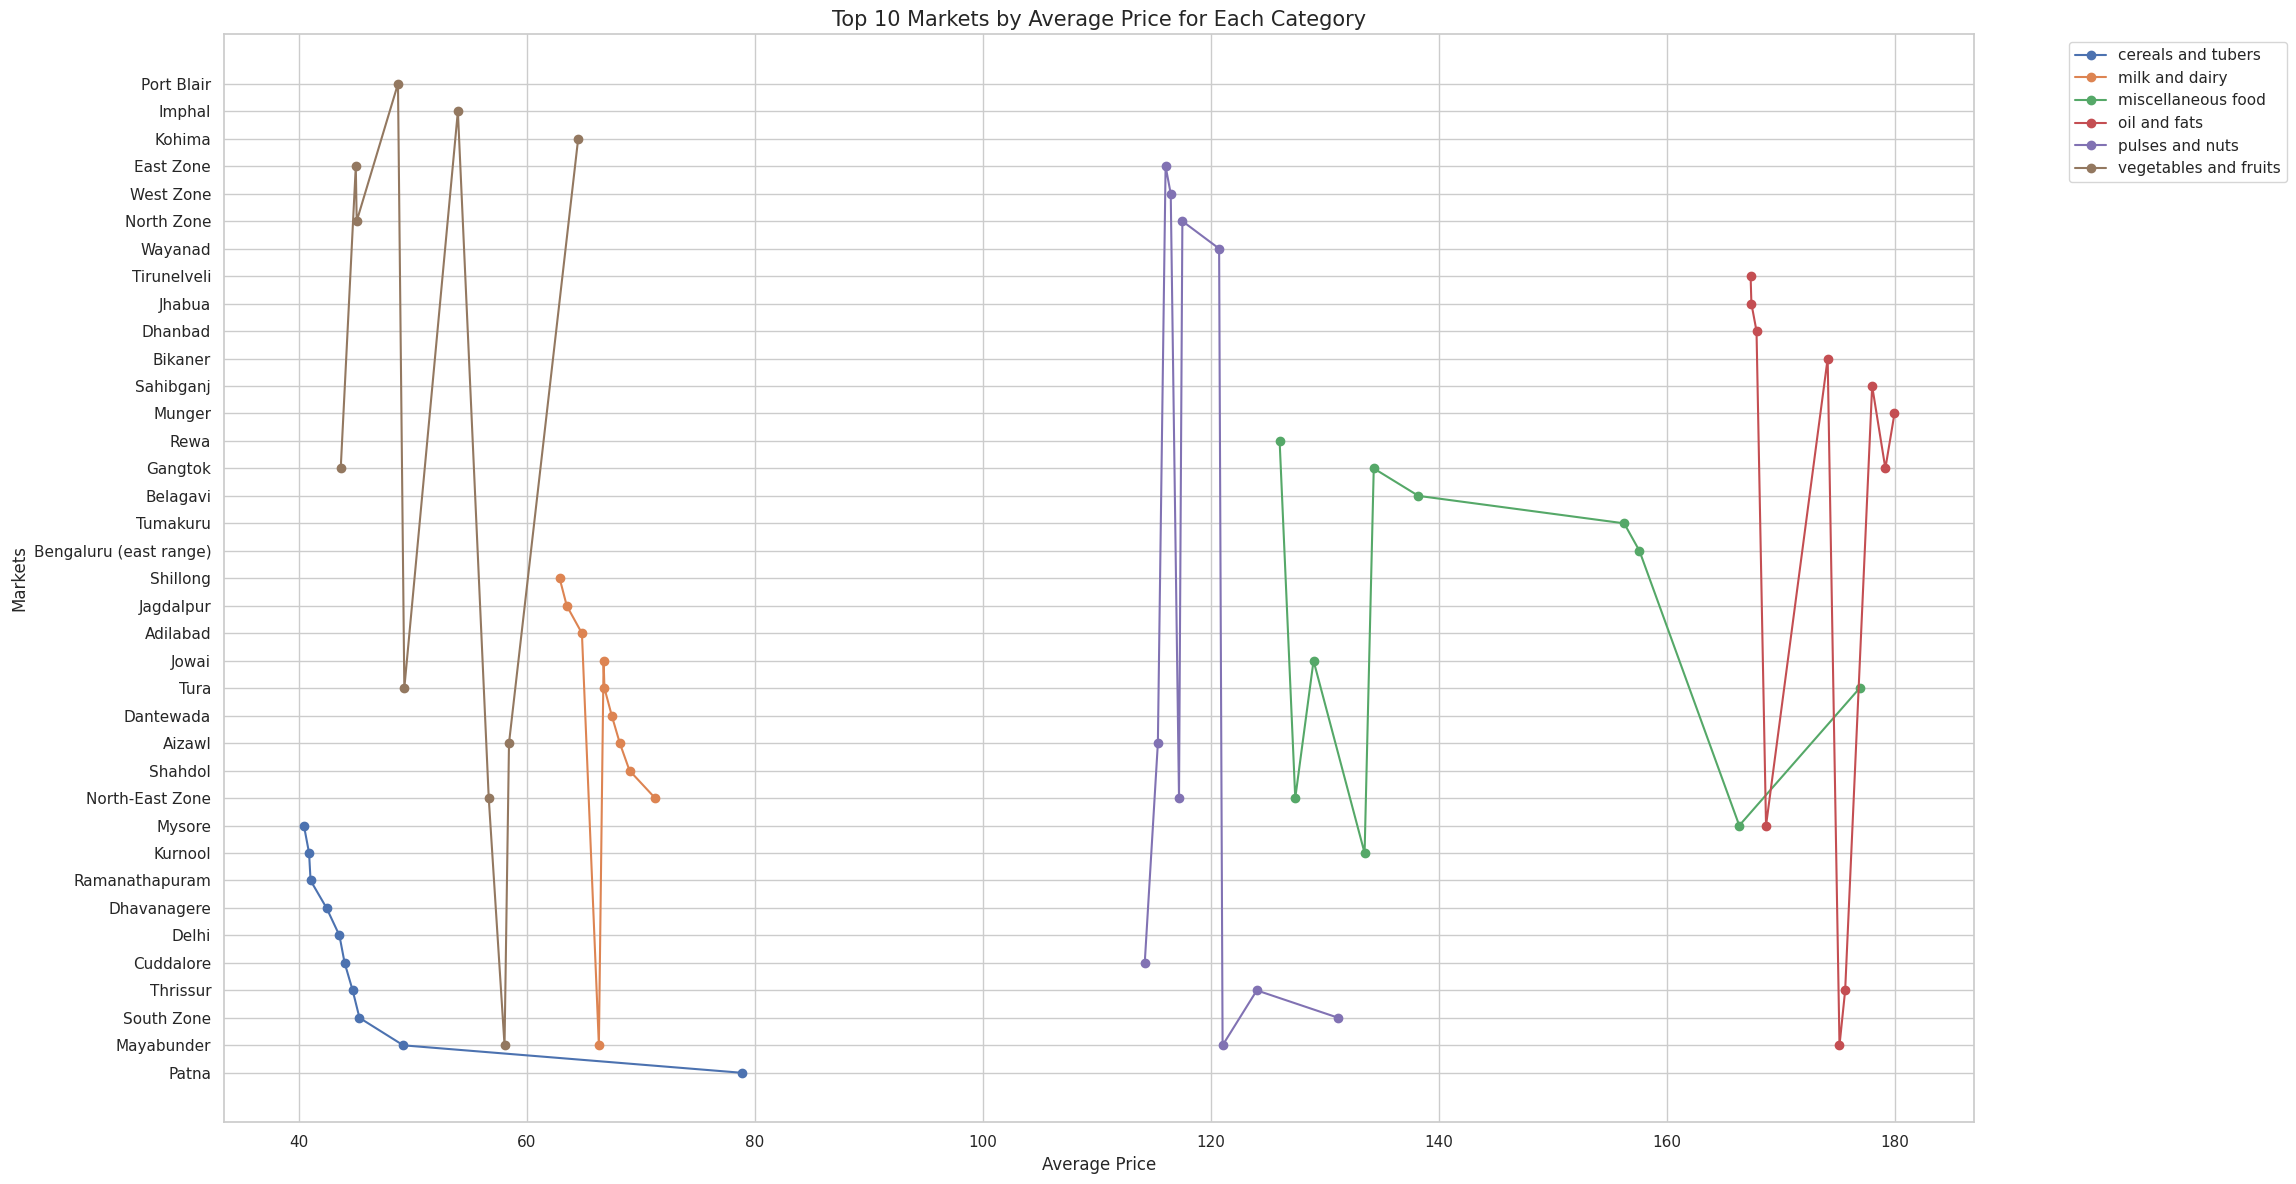

In [ ]:
q5_df = pd.read_csv("./outputs/q5.csv")

plt.figure(figsize=(20, 12))
grouped = q5_df.groupby("category")

# Store the top 10 markets for each category
top_markets_per_category = {}
for category, group in grouped:
    sorted_markets = group.sort_values("market_avg_price", ascending=False)
    top_10_markets = sorted_markets.head(10)
    top_markets_per_category[category] = top_10_markets

top_markets_df = pd.concat(list(top_markets_per_category.values()))

for category, group in top_markets_df.groupby("category"):
    group_sorted = group.sort_values("market_avg_price", ascending=False)
    plt.plot(
        group_sorted["market_avg_price"],
        group_sorted["market"],
        marker="o",
        linestyle="-",
        label=category,
    )

plt.title("Top 10 Markets by Average Price for Each Category", fontsize=15)
plt.xlabel("Average Price", fontsize=12)
plt.ylabel("Markets", fontsize=12)
plt.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()